In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import itertools
from PIL import Image
from scipy.stats import logistic
import math

import csv

x_list=[]
y_list=[]
A_list=[]

# opening the CSV file
with open('.\\finale\\data1.csv', mode ='r') as file:
   
    # reading the CSV file
    csvFile = csv.reader(file)
 
    # displaying the contents of the CSV file
    for lines in csvFile:
        x_list.append(float(lines[0]))
        y_list.append(float(lines[1]))
        A_list.append(float(lines[2]))

In [15]:
plt.rcParams['figure.figsize'] = (20,12)
print(len(A_list))

print(A_list[0])

277204
14.83042118526281


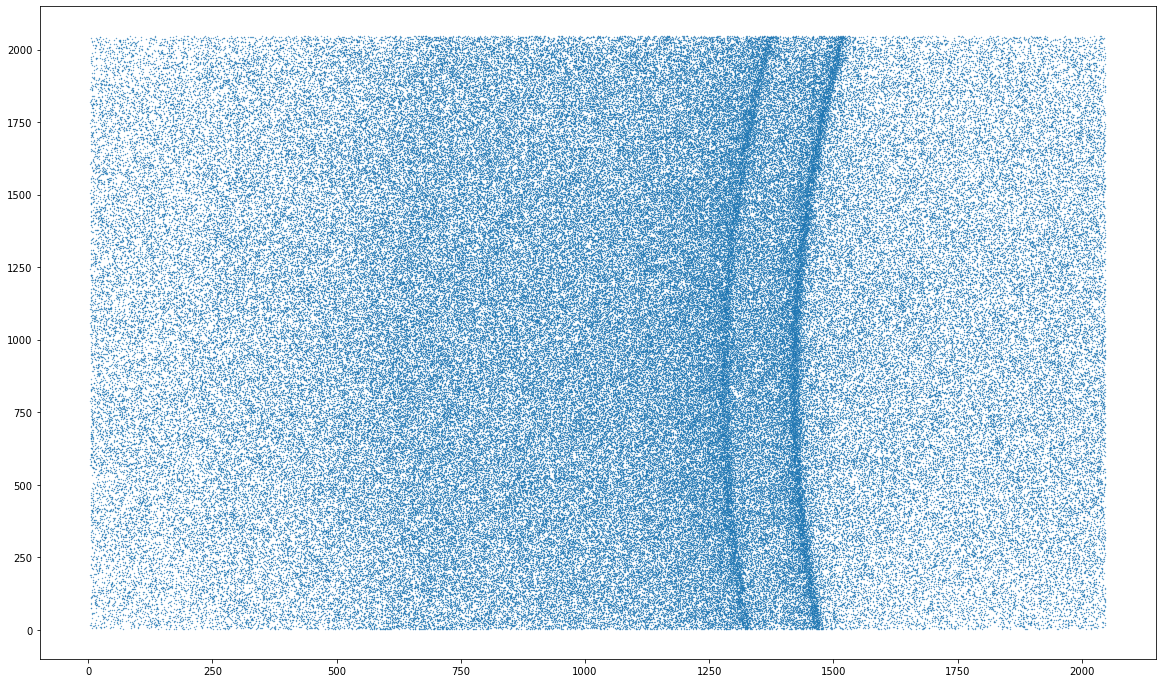

In [3]:
plt.rcParams['figure.figsize'] = (20,12)

#trial=fitting(1,1,0,60000000,900,9000) 
#trial.plot()
plt.scatter(y_list,x_list,s=0.1)
plt.show()

In [16]:

def moving_avg(half_width,input_dat):
    start_index=0
    end_index=0
    avg_dat=np.zeros(2048-half_width)
    for i in input_dat:
        ycoor=i[1]

        start=max(0,int(ycoor)-half_width+1)
        end=min(2048-half_width,int(ycoor)+half_width)

        avg_dat[start:end]=avg_dat[start:end]+i[2]
    return avg_dat

def cutting(cut_num):
    cut_thick=int(2048/cut_num)
    index=0
    l=len(x_list)
    A_dot=[]
    B_dot=[]
    cut_point=[0]
    for n in range(cut_num):
        for i in range(index,l):
            if(x_list[i]>(n+1)*cut_thick):
                index=i
                cut_point.append(index)
                break
        dat=np.transpose([x_list[cut_point[-2]:cut_point[-1]],y_list[cut_point[-2]:cut_point[-1]],A_list[cut_point[-2]:cut_point[-1]]])
        dat = dat[dat[:,1].argsort()]
        ls=moving_avg(10,dat)[::-1]
        #plt.plot(ls)
        #dot.append([int(n*cut_thick+cut_thick/2),np.argmax(ls)])
        """
        for i in range(len(ls)):
            if(ls[i]-ls[i-50]>160000/cut_num):
                dot.append([int(n*cut_thick+cut_thick/2),2048-25-i])
                break
        break
        
        """
        tmp=0
        sec_tmp=0
        tmp_index=0
        sec_tmp_index=0
        
        max_width=100
        for i in range(len(ls)):
            start=max(0,i-max_width)
            end=min(2048,i+max_width)
            if(ls[i]==max(ls[start:end])):
                if(ls[i]>tmp):
                    sec_tmp=tmp
                    sec_tmp_index=tmp_index
                    tmp=ls[i]
                    tmp_index=i
                elif(ls[i]>sec_tmp):
                    sec_tmp=ls[i]
                    sec_tmp_index=i
        A_dot.append([int(n*cut_thick+cut_thick/2),2048-10-min(sec_tmp_index,tmp_index)])
        B_dot.append([int(n*cut_thick+cut_thick/2),2048-10-max(sec_tmp_index,tmp_index)])


    return [A_dot,B_dot]


[[  32 1465]
 [  96 1460]
 [ 160 1450]
 [ 224 1446]
 [ 288 1438]
 [ 352 1435]
 [ 416 1433]
 [ 480 1429]
 [ 544 1426]
 [ 608 1425]
 [ 672 1426]
 [ 736 1422]
 [ 800 1423]
 [ 864 1418]
 [ 928 1423]
 [ 992 1421]
 [1056 1421]
 [1120 1424]
 [1184 1428]
 [1248 1433]
 [1312 1435]
 [1376 1441]
 [1440 1442]
 [1504 1449]
 [1568 1457]
 [1632 1464]
 [1696 1466]
 [1760 1476]
 [1824 1482]
 [1888 1494]
 [1952 1506]
 [2016 1506]]
[[  32 1324]
 [  96 1314]
 [ 160 1312]
 [ 224 1301]
 [ 288 1297]
 [ 352 1291]
 [ 416 1286]
 [ 480 1286]
 [ 544 1287]
 [ 608 1281]
 [ 672 1281]
 [ 736 1281]
 [ 800 1278]
 [ 864 1279]
 [ 928 1284]
 [ 992 1283]
 [1056 1281]
 [1120 1282]
 [1184 1282]
 [1248 1290]
 [1312 1295]
 [1376 1293]
 [1440 1305]
 [1504 1303]
 [1568 1313]
 [1632 1322]
 [1696 1324]
 [1760 1328]
 [1824 1341]
 [1888 1347]
 [1952 1356]
 [2016 1356]]


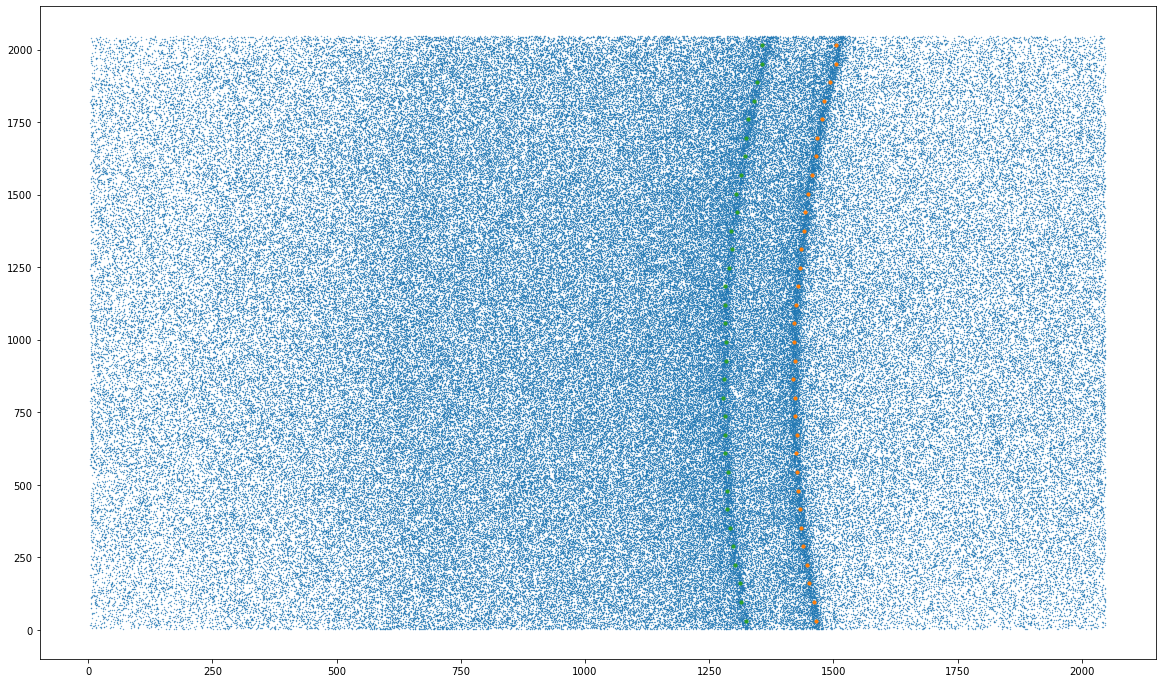

In [24]:
cut_num=32

data=np.transpose([x_list,y_list,A_list])
data=data[data[:,0].argsort()]
x_list,y_list,A_list=np.transpose(data)

A_points, B_points=cutting(cut_num)
A_points=np.transpose(A_points)
B_points=np.transpose(B_points)


print(np.transpose(A_points))
print(np.transpose(B_points))
plt.scatter(y_list,x_list,s=0.1)
plt.scatter(A_points[1],A_points[0],s=10)
plt.scatter(B_points[1],B_points[0],s=10)


In [17]:


class fitting:
    'used to get the spectrum.'
    
    def __init__(self,a,b,c,d,x0,y0):
        self.a=a
        self.b=b
        self.c=c
        self.d=d
        self.x0=x0
        self.y0=y0
        
    def new_value(self,a,b,c,d,x0,y0):
        self.a=a
        self.b=b
        self.c=c
        self.d=d
        self.x0=x0
        self.y0=y0
        
    def conic_section(self,x,y):
        return (x-self.x0)**2+self.b*(y-self.y0)**2.+2*self.c*(x-self.x0)*(y-self.y0)-self.d
        #return (x-self.x0)**2.+(y-self.y0)**2-self.d
    
    """
    def error(self):
        count=0
        for i in range(len(x_list)):
            x=x_list[i]
            y=y_list[i]
            if(np.abs(self.conic_section(x,y))<err_range):
                count=count+A_list[i]
                
        return 0-count
    """
    
    def error(self, point_list):
        err=0
        for point in point_list:
            err=err+self.conic_section(point[0],point[1])**2
        return err
    
    def heatmap(self):
        x=range(2048)
        y=range(2048)
        z=np.zeros([2048,2048])
        for i in x:
            for j in y:
                z[i,j]=self.conic_section(i,j)
        
        plt.contourf(x,y,z,cmap=plt.get_cmap('hot'))
        plt.colorbar()
    
    def plot(self):
        x=range(2048)
        y=range(2048)
        z=np.zeros([2048,2048])
        for i in x:
            for j in y:
                if(np.abs(self.conic_section(i,j))>err_range):
                    z[i,j]=1
                else:
                    z[i,j]=0
        
        plt.contourf(x,y,z,cmap=plt.get_cmap('hot'))
        plt.colorbar()


trial_A=fitting(1.,1,0,57000000,900,9001) 
trial_B=fitting(1.,1,0,60000000,900,9000)

def gradient_descent_fitting(cut,ft=trial_A,output='verbose'):
    points=np.transpose(cut)
    for i in range(100):

        a=ft.a
        b=ft.b
        c=ft.c
        d=ft.d
        x0=ft.x0
        y0=ft.y0
        if(output=='verbose'):
            print(i,'para',[a,b,c,d,x0,y0])
        err=ft.error(points)
        if(output=='verbose'):
            print(err)
        ft.new_value(a+ft_d_a,b,c,d,x0,y0)
        err_a=ft.error(points)-err
        ft.new_value(a,b+ft_d_b,c,d,x0,y0)
        err_b=ft.error(points)-err
        ft.new_value(a,b,c+ft_d_c,d,x0,y0)
        err_c=ft.error(points)-err
        ft.new_value(a,b,c,d+ft_d_d,x0,y0)
        err_d=ft.error(points)-err
        ft.new_value(a,b,c,d,x0+ft_d_x0,y0)
        err_x0=ft.error(points)-err
        ft.new_value(a,b,c,d,x0,y0+ft_d_y0)
        err_y0=ft.error(points)-err
        
        if(output=='verbose'):
            print('err',[err_a,err_b,err_c,err_d,err_x0,err_y0])
        
        a=a-err_a*ft_descent_factor*ft_d_a
        b=b-err_b*ft_descent_factor*ft_d_b
        c=c-err_c*ft_descent_factor*ft_d_c
        d=d-err_d*ft_descent_factor*ft_d_d
        x0=x0-err_x0*ft_descent_factor*ft_d_x0
        y0=y0-err_y0*ft_descent_factor*ft_d_y0
        
        ft.new_value(a,b,c,d,x0,y0)
    
    print(a,b,c,d,x0,y0,err)
    return ft


ft_d_a=0.0001
ft_d_b=0.00001
ft_d_c=0.0001
ft_d_d=100
ft_d_x0=0.01
ft_d_y0=0.01
ft_descent_factor=0.00000003

#trial.plot()
#plt.scatter(cut[1],cut[0],s=10)
#plt.scatter(y_list,x_list,s=0.1)
#trial.conic_section(192,1443)


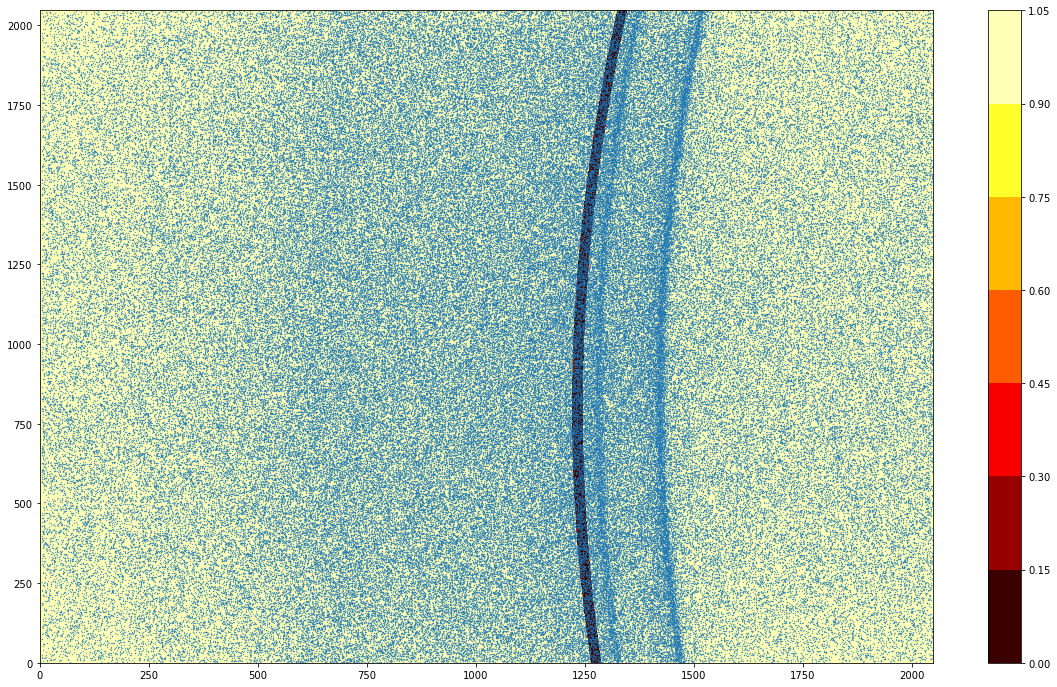

In [49]:
err_range=200000
ft_p=fitting(1.0,-4.5,0,-12000000,800,-400)
ft_p.plot()
plt.scatter(y_list,x_list,s=0.1)

In [66]:
from scipy.optimize import least_squares

def conic_section(x, y, x0, y0, b, c, d):
    return (x-x0)**2+b*(y-y0)**2.+2*c*(x-x0)*(y-y0)-d

points_list=[A_points,B_points]

def error(para):
    pz, alpha, x0, y0=para
    
    err=0
    points0,points1=points_list
    
    points0=np.transpose(points0)
    points1=np.transpose(points1)
    
    sin_theta1=0.653909
    sin_theta2=0.637541
    
    for point in points0:
        x,y=point[0],point[1]
        x=x-x0
        y=y-y0
        err=err+(np.sqrt(x**2+y**2+pz**2)*sin_theta1-y*np.sin(alpha)-pz*np.cos(alpha))**2

    for point in points1:
        x,y=point[0],point[1]
        x=x-x0
        y=y-y0
        err=err+(np.sqrt(x**2+y**2+pz**2)*sin_theta2-y*np.sin(alpha)-pz*np.cos(alpha))**2
    
    return err

para0=[6000,np.pi/3,796,600]

res=least_squares(error,para0,bounds=([0,0,0,0],[np.inf,2*np.pi,2048,2048]))

print(res.x,res.cost,res.optimality)

[6.45836450e+03 9.84928205e-01 7.80871045e+02 5.93963222e+02] 852301.6637525272 61900878.95523017


In [51]:
trial_p=fitting(1,-4.5,0,-12000000,800,-400)

In [7]:
ft_1=fitting(1.,1,0,57000000,900,9001) 
ft_2=fitting(1.,1,0,57000000,900,9000)
print(ft_1.error(A_points),ft_2.error(A_points))

531449965938437.0 530623821110225.0


0 para [1.0, -4.474425203435084, -0.025184617417198553, -12808914.868593829, 796.6665328567368, -270.9876154256717]
33804671205.962215
err [0.0, -435979.138004303, 563327.1509208679, 558756.5169143677, -9325.488910675049, -628184.6059036255]
1 para [1.0, -4.474425072641343, -0.025186307398651315, -12808916.544863379, 796.6665356543834, -270.98742697028996]
33804652634.732277
err [0.0, -429272.93910980225, 536407.9518547058, 535645.1128463745, -7573.618965148926, -592993.2684211731]
2 para [1.0, -4.474424943859461, -0.02518791662250688, -12808918.151798718, 796.6665379264691, -270.98724907230945]
33804636425.048256
err [0.0, -422888.0464706421, 510778.46042633057, 513641.0103187561, -5905.656330108643, -559488.01171875]
3 para [1.0, -4.4744248169930465, -0.02518944895788816, -12808919.692721749, 796.666539698166, -270.9870812259059]
33804622325.248455
err [0.0, -416809.06604385376, 486376.8871574402, 492691.15603256226, -4317.584117889404, -527588.0513534546]
4 para [1.0, -4.47442469195

64 para [1.0, -4.474418681492168, -0.02521856085551821, -12808958.4330711, 796.6662288629002, -270.98525631030645]
33804593712.164356
err [0.0, -302052.740524292, 25729.153076171875, 97209.13468933105, 25666.002113342285, 74605.18742752075]
65 para [1.0, -4.474418590876345, -0.02521863804297744, -12808958.724698503, 796.6662211630995, -270.9852786918627]
33804594066.73324
err [0.0, -301763.10737228394, 24566.530658721924, 96211.0115776062, 25741.690830230713, 76125.05251312256]
66 para [1.0, -4.474418500347413, -0.025218711742569417, -12808959.013331538, 796.6662134405923, -270.98530152937843]
33804594397.811367
err [0.0, -301487.3510437012, 23459.61088180542, 95260.71030044556, 25813.75412750244, 77572.10139083862]
67 para [1.0, -4.474418409901208, -0.025218782121402064, -12808959.299113669, 796.666205696466, -270.98532480100886]
33804594706.264572
err [0.0, -301224.80533981323, 22405.72344970703, 94355.93975448608, 25882.364387512207, 78949.82246017456]
68 para [1.0, -4.4744183195337

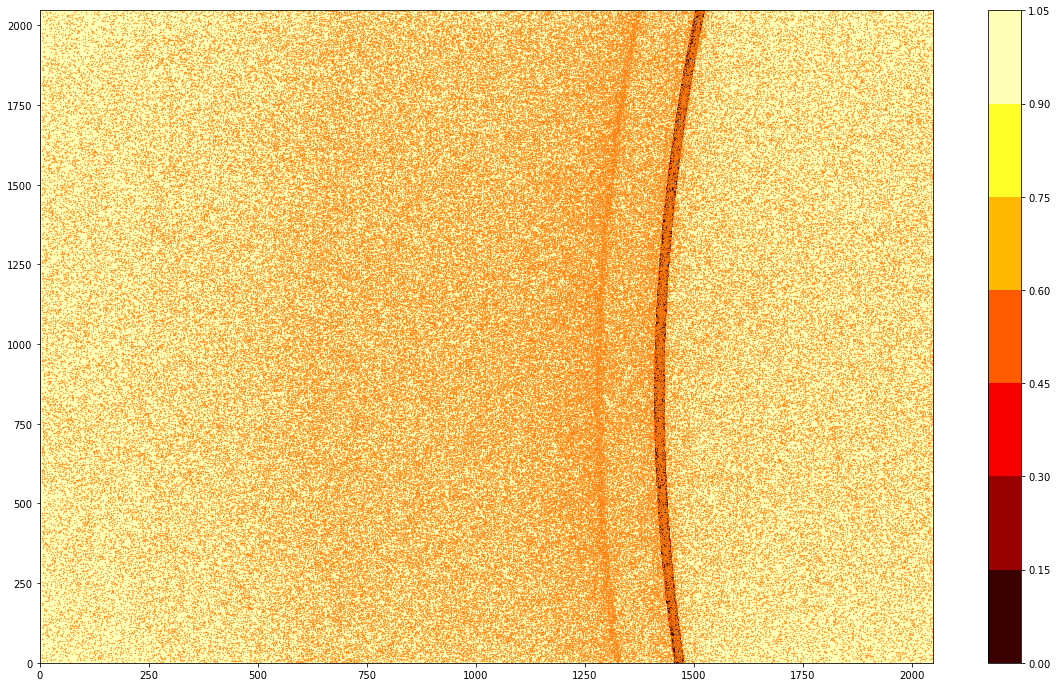

In [55]:
ft=gradient_descent_fitting(A_points,ft=trial_p)
ft.plot()
plt.scatter(A_points[1],A_points[0],s=10)
plt.scatter(y_list,x_list,s=0.1)


1.0 -4.478022576717167 -0.03570688499093789 -10820023.425517049 797.3374497700877 -279.52204411027475 118876679913.07036


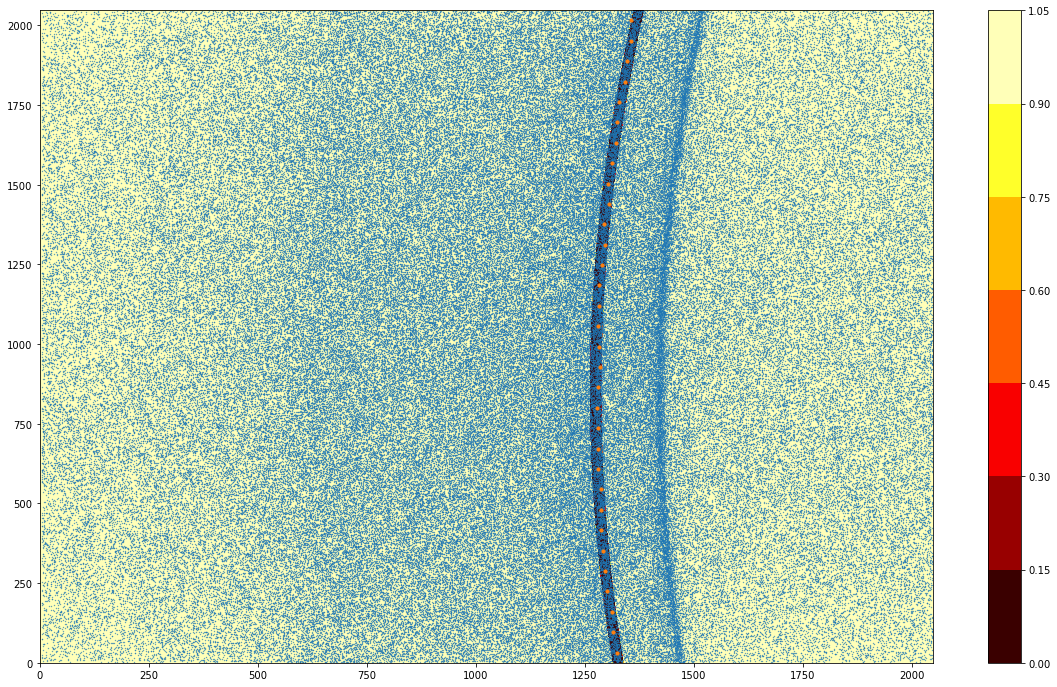

In [56]:
trial_q=fitting(1,-4.5,0,-10000000,800,-400)
ft=gradient_descent_fitting(B_points,output='1',ft=trial_q)


ft.plot()
plt.scatter(y_list,x_list,s=0.1)
plt.scatter(B_points[1],B_points[0],s=10)

273881


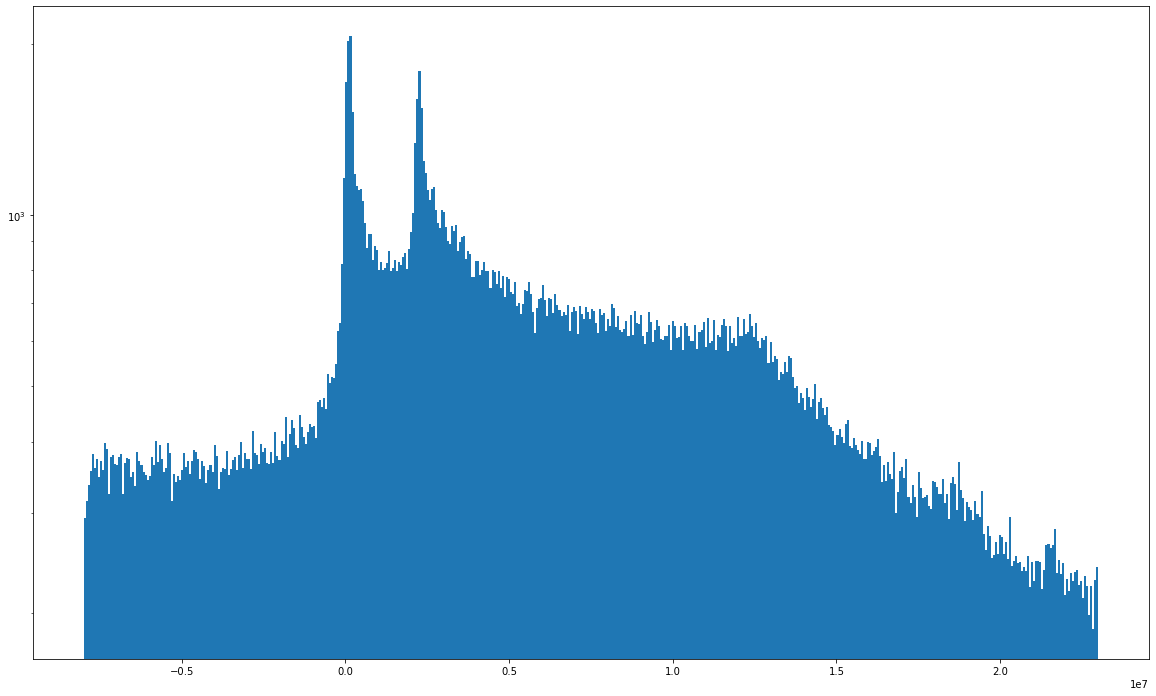

In [18]:
plt.rcParams['figure.figsize'] = (20,12)
A=[]
for i in range(len(x_list)):
    x=x_list[i]
    y=y_list[i]
    #c_value=ft.conic_section(x,y)
    #c_value=c_value
    A.append(ft.conic_section(x,y))
print(len(A))
plt.hist(A,bins=500,log='True',range=[-0.8e7,2.3e7]);


In [183]:

import random
        
def annealing(steps, ft):
    T=100
    
    a=ft.a
    b=ft.b
    c=ft.c
    d=ft.d
    x0=ft.x0
    y0=ft.y0
    
    for i in range(steps):
        
        print(T)
        
        err=ft.error()
        
        print(err)
        d_a=0.001
        d_b=0.001
        d_c=0.001
        d_d=100000
        d_x0=10
        d_y0=10
        descent_factor=0.02
        
        
        a=a+d_a*random.uniform(-1,1)*descent_factor*T
        b=b+d_b*random.uniform(-1,1)*descent_factor*T
        c=c+d_c*random.uniform(-1,1)*descent_factor*T
        d=d+d_d*random.uniform(-1,1)*descent_factor*T
        x0=x0+d_x0*random.uniform(-1,1)*descent_factor*T
        y0=y0+d_y0*random.uniform(-1,1)*descent_factor*T
        
        print([a,b,c,d,x0,y0])
        
        attempt=fitting(a,b,c,d,x0,y0)
        
        new_err=attempt.error()
        print(new_err)
        
        if(new_err<err):
            ft=attempt
            print('yes')
        else:
            if(random.random()<np.exp(-(new_err-err)/(2*T))):
                ft=attempt
                print('yes')
            else:
                print('no')
        
        T=T-100/steps
    return ft
result=annealing(100,trial)
result.plot()
plt.scatter(y_list,x_list,s=0.1)

100
[1.77582042e+39 5.04025257e+39 7.91475332e+39 3.91795789e+40
 1.56485818e+40 1.82220798e+40 1.45030477e+40 5.04025541e+39
 1.82220798e+40 2.05948457e+39 1.77581971e+39 8.49969449e+38
 5.50174099e+37 5.50173976e+37]
[-1.77582042e+39 -5.04025257e+39 -7.91475332e+39 -3.91795789e+40
 -1.56485818e+40 -1.82220798e+40 -1.45030477e+40 -5.04025541e+39
 -1.82220798e+40 -2.05948457e+39 -1.77581971e+39 -8.49969449e+38
 -5.50174099e+37 -5.50173976e+37]
[array([1.19667699, 1.13912223, 1.05618807, 1.03041789, 0.99938507,
       0.99911546, 1.00728913, 1.02394441, 1.05428434, 1.09075491,
       1.136085  , 1.19049292, 1.25808338, 1.33661758]), array([7.62881313e+10, 1.08012720e+11, 1.25546074e+11, 2.13965571e+11,
       1.57573217e+11, 1.65776677e+11, 1.53630402e+11, 1.08012720e+11,
       1.65776677e+11, 8.01512240e+10, 7.62881313e+10, 5.96749077e+10,
       2.39601884e+10, 2.39601830e+10]), array([0.03421574, 0.10294546, 0.24008527, 0.31218835, 0.45140156,
       0.52163157, 0.5885171 , 0.665614

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [14]:
A=[]
for i in range(len(x_list)):
    x=x_list[i]
    y=y_list[i]
    A.append(result.conic_section(x,y))
    
plt.hist(A,bins=200);

NameError: name 'result' is not defined

In [ ]:

err_range=200000

trial=fitting(1,1,0,30000000,1000,7000) 
ft=gradient_descent_fitting(trial)
ft.plot()
plt.scatter(y_list,x_list,s=0.1)

In [ ]:
trial=fitting(1,1,0,30000000,1000,7000) 
trial.plot()